# TOC:
- [Part-(a)](Part-(a))
- [Part-(b)](Part-(b))
- [Part-(c)](Part-(c))
- [Part-(d)](Part-(d))
- [Part-(e)](Part-(e))

## Part-(a)

---
**First visualize the data via a plot.**

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [53]:
# read data using pandas
#############
# please use appropriate data file
#############
msgData=pd.read_csv('../msgData.csv',header=None)

In [54]:
# get basic info about data
msgData.describe()

,0
count,74.000000
mean,19.743243
std,14.141226
min,0.000000
25%,11.000000
50%,17.000000
75%,23.000000
max,72.000000


In [55]:
mu=msgData.mean()[0]
var=mu

- Since MLE solution for eatimate of $\lambda$ is sample mean.
- Also sd is same as mean for Poisson dist.

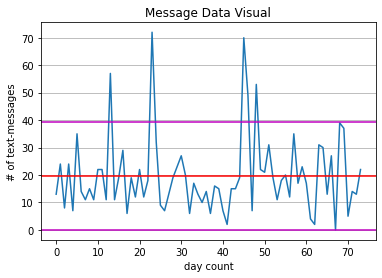

In [56]:
# plot data with mean line
plt.plot(msgData)
plt.axhline(y=mu,c='r')
plt.axhline(y=mu+var,c='m')
plt.axhline(y=mu-var,c='m')
plt.title('Message Data Visual')
plt.xlabel('day count')
plt.ylabel('# of text-messages')
plt.grid(axis='y')
plt.show()

- This one is a simple line plot with horizontal grid lines at mu, mu-var, and mu+var
- My transition critaria is any point that is outside of mu+var and mu-var. Lines are shown in plot.

## Part-(b)

---
**Based on the plot tentatively identify regions between which you think there has been a transition in λ.**

- It is clear that according to my definition of transition there are at least four points where behaviour is a bit unusual. And these points are quite clearly observable from plot.

## Part-(c)

---
**Do Bayesian parameter estimation to either confirm your assumption about transitions or disconfirm it. Note that this depends on your definition of what constitutes a significant transition.**

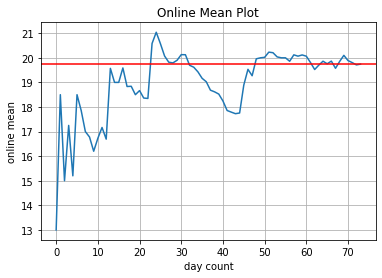

In [57]:
# avg data plot
list_data=list(msgData[0])
avgData=[np.mean(list_data[:i+1]) for i,_ in enumerate(list_data)]
plt.plot(avgData)
plt.axhline(y=mu,c='r')
plt.title('Online Mean Plot')
plt.xlabel('day count')
plt.ylabel('online mean')
plt.grid()
plt.show()

- from plot it is clear that if we ignore starting point zig-zag we have at least four points where online mean has jumped unusually from its prevoius point.

## Part-(d)

---
**Do your analysis with at least the following two priors i) Uniform prior and ii) a prior that is exponentially
distributed - this will mean you are introducing yet another parameter that defines the exponential
distribution.**

- Uniform Prior that is distributed on interval [0,$\lambda_{MAX}$]. Here $\lambda_{MAX}$ is 72. Also note that unniform distribution is simply Gamma distribution with shape = 1 and rate = 0.

And we know that Poisson and Gamma are conjugate dist so we have simple closed form Gamma distibution for Posterior dist. With shape = prior_shape + $\sum_{n=1}^N x_i$ and rate = prior_rate + N. This solution is in general true with any value of prior rate and shape. SO this also applies for second part with Gamma distribution(it is exponentially distibuted). Now the task is to find appropriate values of rate and shape in part-ii).

In [58]:
max(list_data)

72.0

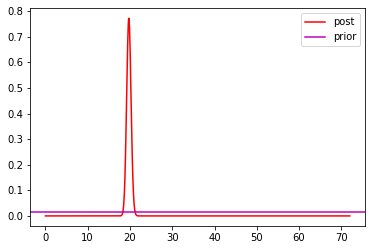

In [73]:
x = np.linspace(0, 72, 1000)
y = stats.gamma.pdf(x, a=sum(list_data) ,scale=1/len(list_data))

plt.plot(x, y, "r-", label='post')
plt.axhline(y=1/max(list_data),c='m',label='prior')
plt.legend(loc='upper right')

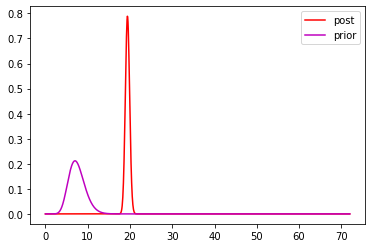

In [81]:
# part-2
# with specific prior mentioned below
alpha=15
beta=2
x = np.linspace(0, 72, 1000)
y1 = stats.gamma.pdf(x, a=alpha ,scale=1/beta)
y2 = stats.gamma.pdf(x, a=alpha+sum(list_data) ,scale=1/((beta)+len(list_data)))

plt.plot(x, y2, "r-", label='post')
plt.plot(x,y1,c='m',label='prior')
plt.legend(loc='upper right')

## Part-(e)

---
**Is either prior better than the other? Justify your answer.**

- It depends on the situation in general senerio. When prior is non-informative we have domination of data/lik. And when prior dist is very specific we have domination of specific prior. Here both priors seems to give same answer.